In [31]:
from nbodykit.lab import *
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera
from IPython.display import HTML
import pandas as pd

# Power Spectrum with Varying $n_s$

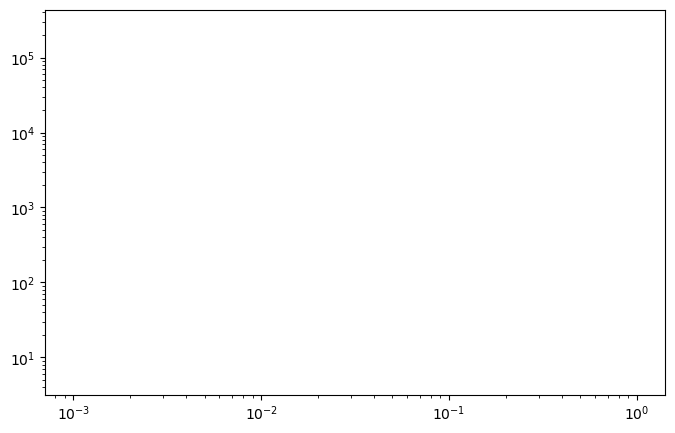

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

fig.suptitle("Linear Power Spectrum Evolution for Changing $n_s$")
fig.set_xlabel('$k$')
fig.set_ylabel('$P$')

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='teal')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

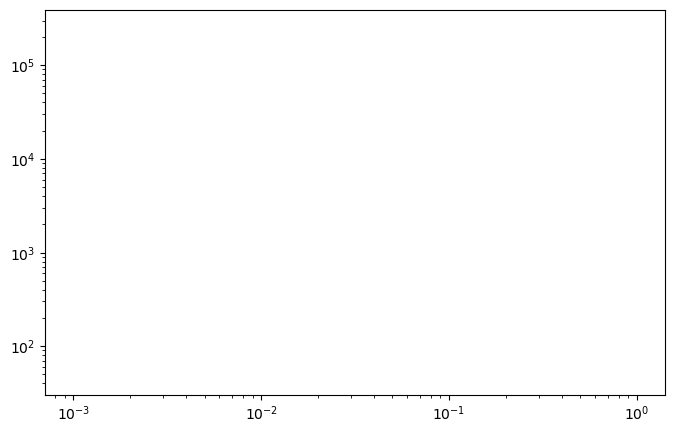

In [62]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)
fig.suptitle("Non-Linear Power Spectrum Evolution for Changing $n_s$")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0)

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

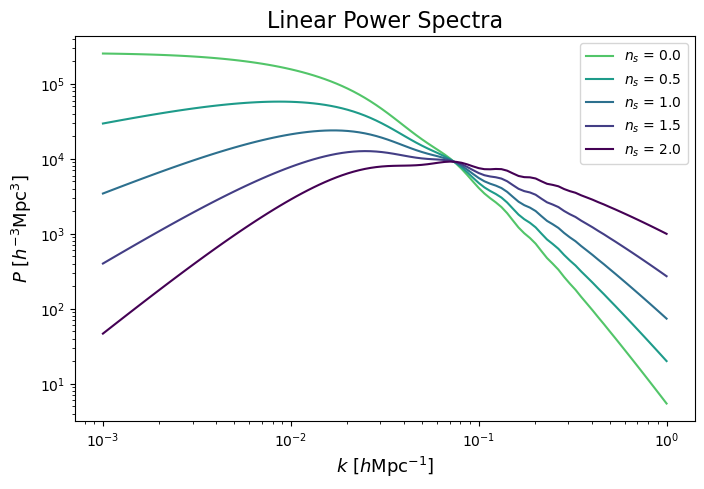

In [127]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$", fontsize=13)
ax.set_ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$", fontsize=13)
ax.set_title("Linear Power Spectra", fontsize=16)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')

    col = n_s/3 + .3
    ax.loglog(k, pSpec(k), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

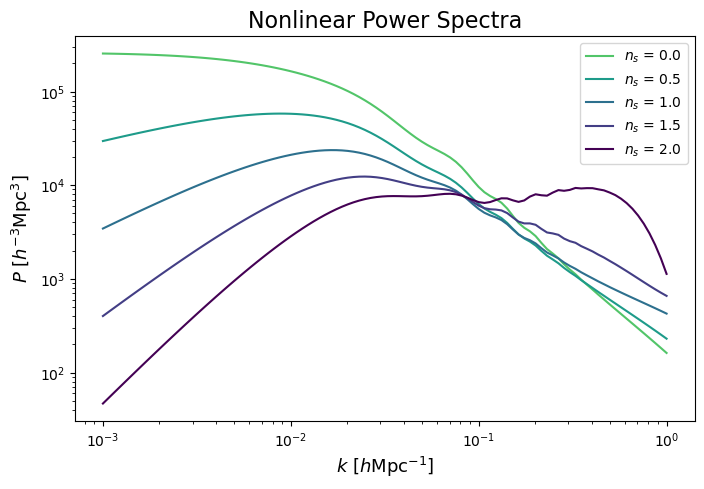

In [128]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$", fontsize=13)
ax.set_ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$", fontsize=13)
ax.set_title("Nonlinear Power Spectra", fontsize=16)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0)

    col = n_s/3 + .3
    ax.loglog(k, pSpec(k), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

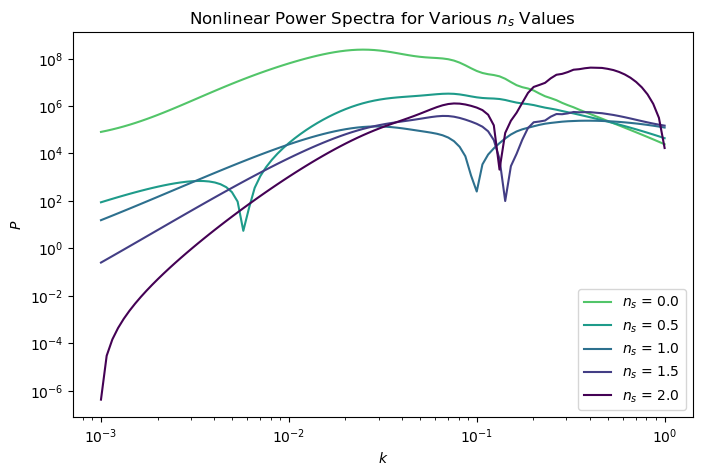

In [56]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel('$k$')
ax.set_ylabel('Difference')
ax.set_title("Nonlinear Power Spectra for Various $n_s$ Values")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    lpSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    nlpSpec = cosmology.HalofitPower(cosmo, redshift=0)

    col = n_s/3 + .3
    ax.loglog(k, np.square(lpSpec(k)-nlpSpec(k)), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

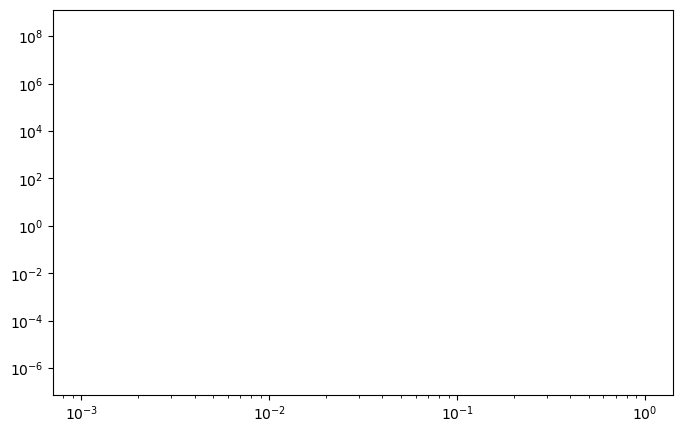

In [57]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    lpSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    nlpSpec = cosmology.HalofitPower(cosmo, redshift=0)

    #ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, np.square(lpSpec(k)-nlpSpec(k)), c='firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

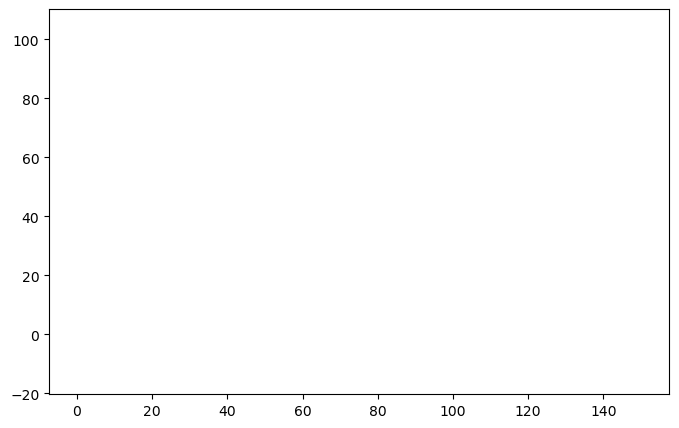

In [6]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    ax.text(0,100,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.plot(r, r**2 * cFunc(r), c = 'firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

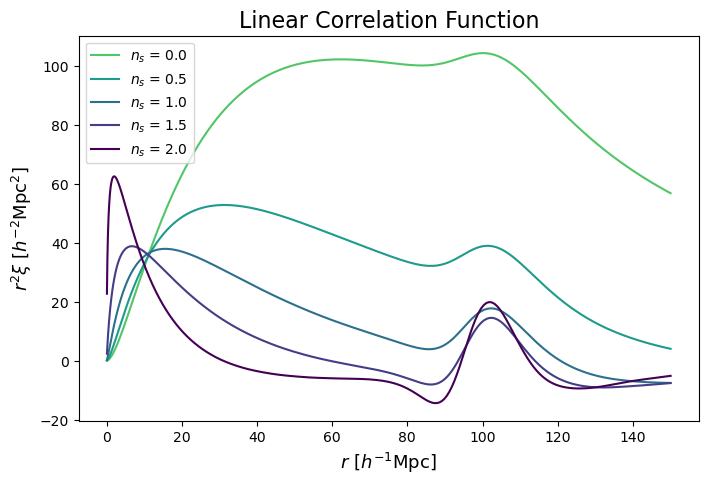

In [129]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel(r"$r$ $[h^{-1} \mathrm{Mpc}]$", fontsize=13)
ax.set_ylabel(r"$r^2 \xi \ [h^{-2} \mathrm{Mpc}^2]$", fontsize=13)
ax.set_title("Linear Correlation Function", fontsize=16)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    col = n_s/3 + .3
    ax.plot(r, r**2 * cFunc(r), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

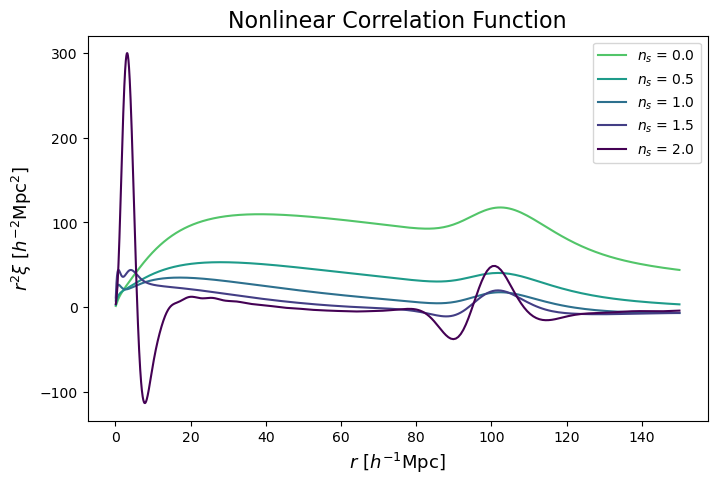

In [130]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel(r"$r$ $[h^{-1} \mathrm{Mpc}]$", fontsize=13)
ax.set_ylabel(r"$r^2 \xi \ [h^{-2} \mathrm{Mpc}^2]$", fontsize=13)
ax.set_title("Nonlinear Correlation Function", fontsize=16)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0)
    cFunc = cosmology.CorrelationFunction(pSpec)

    col = n_s/3 + .3
    ax.plot(r, r**2 * cFunc(r), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

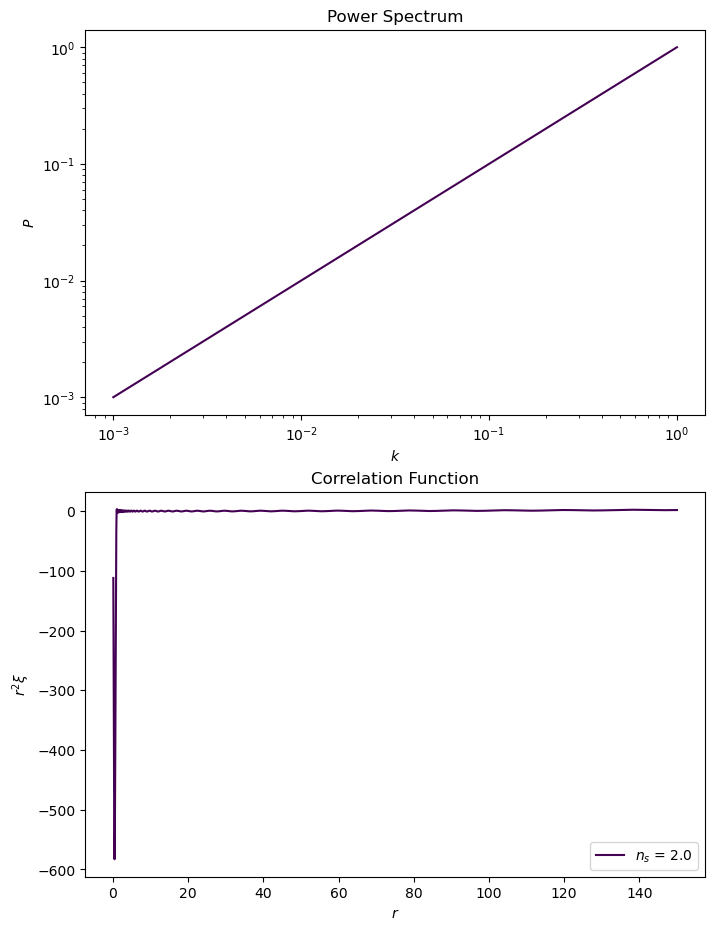

In [74]:
fig,ax = plt.subplots(nrows=2, figsize=(8,11))
cmap = cm.get_cmap('viridis_r', 12)
ax[1].set_xlabel('$r$')
ax[1].set_ylabel(r"$r^2 \xi$")
ax[1].set_title("Correlation Function")

ax[0].set_xlabel('$k$')
ax[0].set_ylabel(r"$P$")
ax[0].set_title("Power Spectrum")

def pk(k):
    return k

xi = pk_to_xi(k,pk(k))

col = n_s/3 + .3
ax[1].plot(r, r**2 * xi(r), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')
ax[0].loglog(k, pSpec(k), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

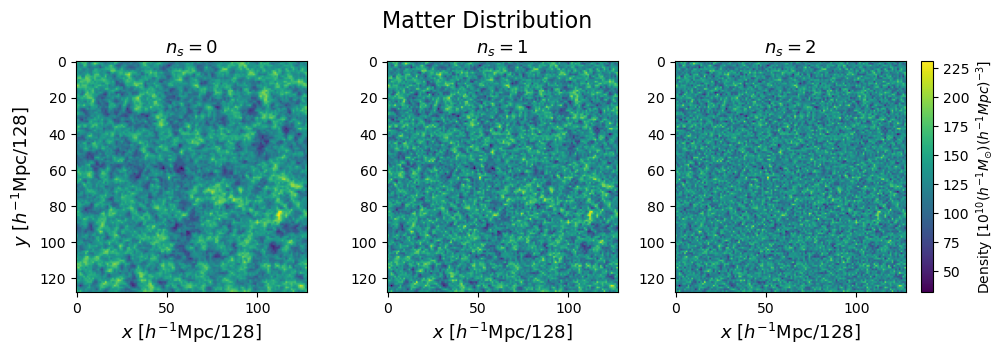

In [151]:
fig,axs = plt.subplots(ncols=3, figsize = (12,3))
plt.subplots_adjust(wspace=.01, hspace=.01)
fig.suptitle("Matter Distribution", fontsize=16,x=.5,y=1.05)
cosmo = cosmology.Planck15

axs[0].set_ylabel(r"$y$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)

cosmo = cosmo.clone(n_s=0)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
axs[0].set_xlabel(r"$x$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)
axs[0].set_ylabel(r"$y$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)
axs[0].set_title("$n_s = 0$", fontsize=13)
axs[0].imshow(mesh.preview(axes=[0,1]))

cosmo = cosmo.clone(n_s=1)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
axs[1].set_xlabel(r"$x$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)
axs[1].set_title("$n_s = 1$", fontsize=13)
axs[1].imshow(mesh.preview(axes=[0,1]))

cosmo = cosmo.clone(n_s=2)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
axs[2].set_xlabel(r"$x$ $[h^{-1} \mathrm{Mpc} / 128]$", fontsize=13)
axs[2].set_title("$n_s = 2$", fontsize=13)
im = axs[2].imshow(mesh.preview(axes=[0,1]))
plt.colorbar(im, label=r"Density [$10^{10}(h^{-1}M_{\odot})(h^{-1}Mpc)^{-3}$]")

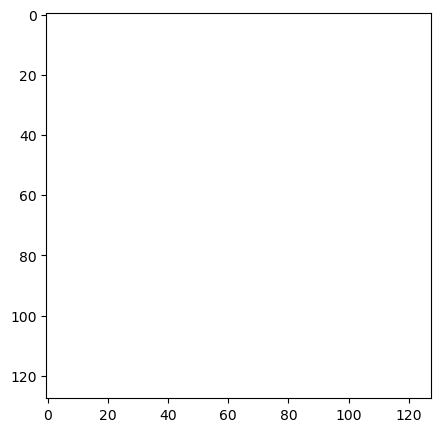

In [20]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)

    #ax.text(0,100,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')

    plt.imshow(mesh.preview(axes=[0,1]))
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

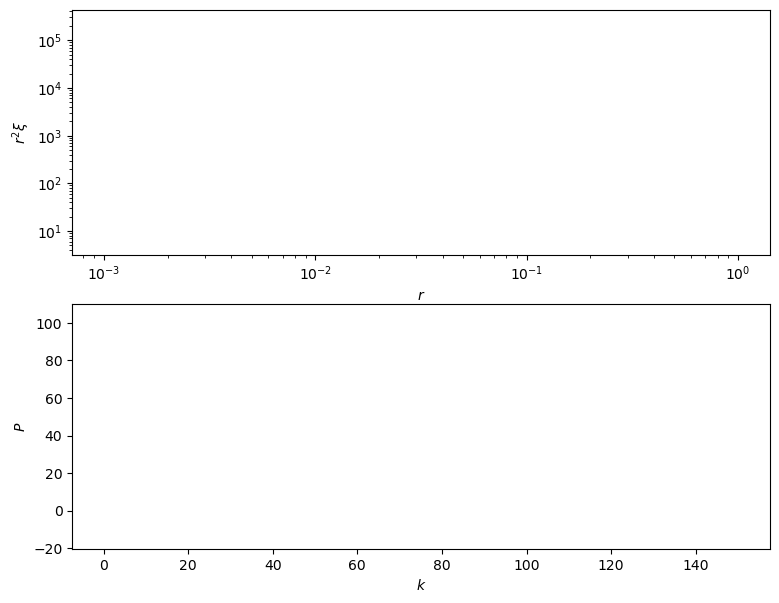

In [24]:
fig,axs = plt.subplots(nrows=2,figsize=(9,7))
axs[1].set_xlabel("$k$")
axs[1].set_ylabel("$P$")

axs[0].set_xlabel("$r$")
axs[0].set_ylabel(r"$r^2 \xi$")

camera = Camera(fig)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    axs[0].text(.6,1e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    axs[0].loglog(k, pSpec(k), c='firebrick')
    axs[1].plot(r, r**2 * cFunc(r), c = 'firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

In [94]:
from nbodykit.cosmology.power.linear import LinearPower
class power_func(LinearPower):
    def __call__(self,k):
        return k

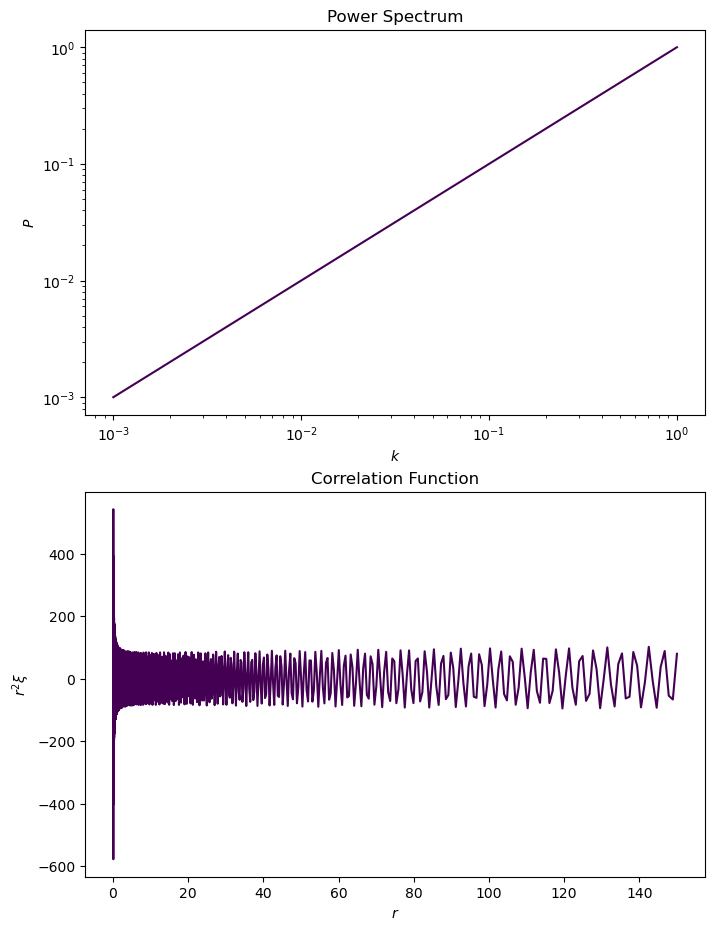

In [95]:
fig,ax = plt.subplots(nrows=2, figsize=(8,11))
cmap = cm.get_cmap('viridis_r', 12)
ax[1].set_xlabel('$r$')
ax[1].set_ylabel(r"$r^2 \xi$")
ax[1].set_title("Correlation Function")

ax[0].set_xlabel('$k$')
ax[0].set_ylabel(r"$P$")
ax[0].set_title("Power Spectrum")

def call(k):
    return k**2

pSpec = power_func(cosmo, redshift=0., transfer='CLASS')
cFunc = cosmology.CorrelationFunction(pSpec)

col = n_s/3 + .3
ax[1].plot(r, r**2 * cFunc(r), c = cmap(col))
ax[0].loglog(k, pSpec(k), c = cmap(col))

plt.show()